<a href="https://colab.research.google.com/github/patlfer0078/Oliver-Pharr/blob/main/Oliver_Pharr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

Nano-indentation info:

*   indent_type - "Berkovich"
*   theta = 65.27 degrees
*   poisson ratio of bone = 0.3



In [2]:
# area function - will be used at end
def area(h):
  return 24.5 * h ** 2
# poisson ratio
neu = 0.3 # poissons ratio of bone

In [3]:
# Load data
filepath = "Prb2Data-1.xlsx"
data = pd.read_excel(filepath)
df = pd.DataFrame(data)

df

,Healthy_Disp (nm),Healthy_Load (mN),New_Disp (nm),New_Load (mN)
0,0.000000,0.000000,0.000000,0.000000
1,15.270936,0.022124,6.341463,0.006700
2,33.990148,0.061947,16.585366,0.013393
3,51.724138,0.115044,25.853659,0.022321
4,70.935961,0.172566,36.097561,0.040179
...,...,...,...,...
77,354.679803,0.314159,334.146341,0.098214
78,344.334975,0.230088,325.853659,0.080357
79,333.497537,0.159292,315.121951,0.040179
80,324.630542,0.106195,305.365854,0.031250


In [4]:
#Unit Conversion
DF = df.copy() #copy over data to new df
DF.columns = ['Healthy_Disp(m)', 'Healthy_Load(N)', 'New_Disp(m)', 'New_Load(N)'] #renaming columns to reflect unit change
DF = DF * [1E-9, 1E-3, 1E-9, 1E-3] #multiply each column by respective amount, nm to m and mN to N
DF

,Healthy_Disp(m),Healthy_Load(N),New_Disp(m),New_Load(N)
0,0.000000e+00,0.000000,0.000000e+00,0.000000
1,1.527094e-08,0.000022,6.341463e-09,0.000007
2,3.399015e-08,0.000062,1.658537e-08,0.000013
3,5.172414e-08,0.000115,2.585366e-08,0.000022
4,7.093596e-08,0.000173,3.609756e-08,0.000040
...,...,...,...,...
77,3.546798e-07,0.000314,3.341463e-07,0.000098
78,3.443350e-07,0.000230,3.258537e-07,0.000080
79,3.334975e-07,0.000159,3.151220e-07,0.000040
80,3.246305e-07,0.000106,3.053659e-07,0.000031


In [5]:
DF1 = DF[['Healthy_Disp(m)','Healthy_Load(N)']].copy() #Healthy
DF2 = DF[['New_Disp(m)', 'New_Load(N)']].copy() #New Bone

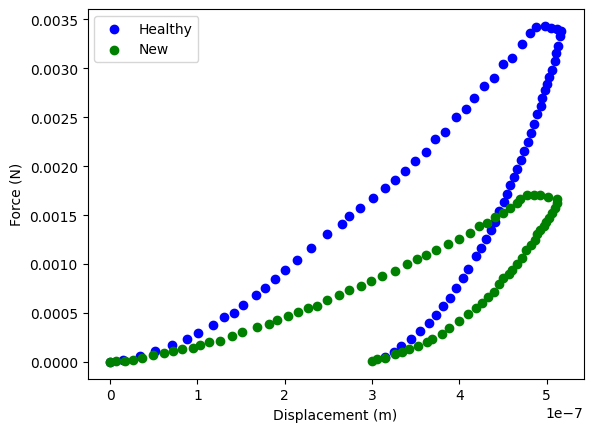

In [6]:
# Initial Plots
plt.scatter(DF1['Healthy_Disp(m)'], DF1['Healthy_Load(N)'], color='blue', marker='o', label='Healthy')
plt.scatter(DF2['New_Disp(m)'], DF2['New_Load(N)'], color='green', marker='o', label='New')
plt.xlabel('Displacement (m)')
plt.ylabel('Force (N)')
plt.legend()


In [7]:
#Get slope calculation from linear fit
PF1 = np.polyfit(DF1.iloc[42:51, 0], DF1.iloc[42:51, 1], 1)
PF2 = np.polyfit(DF2.iloc[47:53, 0], DF2.iloc[47:53, 1], 1)

hc1 = -PF1[1] / PF1[0]
hc2 = -PF2[1] / PF2[0]

Now that the slope has been calculated, we can can recreate our original plot to include the new found slops and proceed with the modulus calculations.

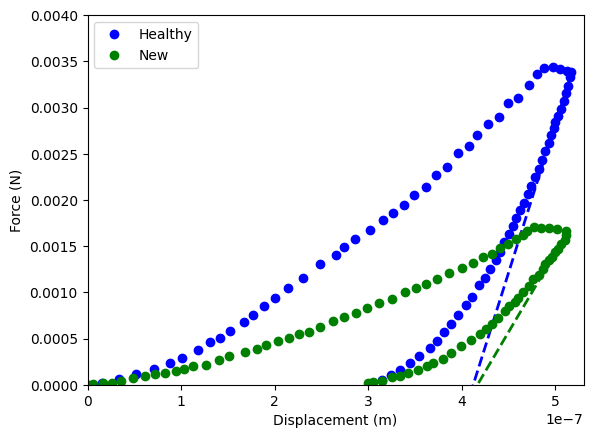

In [8]:
# Line plot
plt.plot(DF1.iloc[42:, 0], np.polyval(PF1, DF1.iloc[42:, 0]), 'b--', linewidth=2)
plt.plot(DF2.iloc[47:, 0], np.polyval(PF2, DF2.iloc[47:, 0]), 'g--', linewidth=2)

# Load-Displacement plot
leg1, = plt.plot(DF1.iloc[:, 0], DF1.iloc[:, 1], 'bo', label='Healthy')
leg2, = plt.plot(DF2.iloc[:, 0], DF2.iloc[:, 1], 'go', label='New')

plt.xlim([0, 5.3E-7])
plt.ylim([0, 4E-3])
plt.xlabel('Displacement (m)')
plt.ylabel('Force (N)')
plt.legend(handles=[leg1, leg2])

plt.show()

Using the slope from the unloading portion of the graph, we can now find the Elastic modulus. According to the Oliver-Pharr model, the unloading curve is assumed to have elastic deformation. dP/dh (slope of unloading) is generally calculated from the initial unloading regime (up to 80% max load).

Modulus, E, is given by:
E = (((sqr(pi)/2)*(1-v* **2)) / sqr(Area)) * dP/dh



In [9]:
# Elastic Modulus
E1 = np.sqrt(np.pi) * (1 - neu**2) * PF1[0] / (2 * np.sqrt(area(hc1)))  # Healthy
E2 = np.sqrt(np.pi) * (1 - neu**2) * PF2[0] / (2 * np.sqrt(area(hc2)))  # New

print(f'Elastic Modulus (Healthy): {E1} Pascals')
print(f'Elastic Modulus (New): {E2} Pascals')

Elastic Modulus (Healthy): 12696871166.081087 Pascals
Elastic Modulus (New): 6714750760.815868 Pascals


For more on nanoindentation, follow: https://en.wikipedia.org/wiki/Nanoindentation